# Neural Prophet México

In [1]:
# Instalando a blibioteca
!pip install neuralprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.6/113.6 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.0/232.0 KB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 419.6/419.6 KB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.5/706.5 KB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 72.8 MB/s eta 0:00:00


In [2]:
# Importando as Blibiotecas

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from neuralprophet import NeuralProphet
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [4]:
url ='https://raw.githubusercontent.com/aaasatoou/bootcamp_blue_Projeto2/main/datasets/serie%20temporal%20pais/S%C3%A9ries%20Temporais%20M%C3%A9xico.csv'
serie_mex = pd.read_csv(url)
serie_mex.drop(['Unnamed: 0','Confirmed','Recovered','Ano'],axis=1,
               inplace=True)
serie_mex.head()

,Date,Deaths
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [5]:
serie_mex.columns = ['ds','y']
serie_mex.head()

,ds,y
0,2020-01-22,0
1,2020-01-23,0
2,2020-01-24,0
3,2020-01-25,0
4,2020-01-26,0


In [6]:
# Separando o dataset em treino e teste
treino = serie_mex[0:679]
teste = serie_mex[679:710]

In [255]:
modelo = NeuralProphet(seasonality_mode='additive', num_hidden_layers=10, 
                       d_hidden=10, learning_rate=0.5, batch_size=80, epochs=50,
                       daily_seasonality=5,n_forecasts=3,yearly_seasonality=1.5, 
                       weekly_seasonality=8
                       )

In [256]:
metrics = modelo.fit(treino, freq='D') 

WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")

  warnings.warn("Can't initialize NVML")

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__ini

Training: 0it [00:00, ?it/s]

In [257]:
future = modelo.make_future_dataframe(treino, periods=len(teste))
forecast = modelo.predict(future)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.853% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.853% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.774% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.774% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 9it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


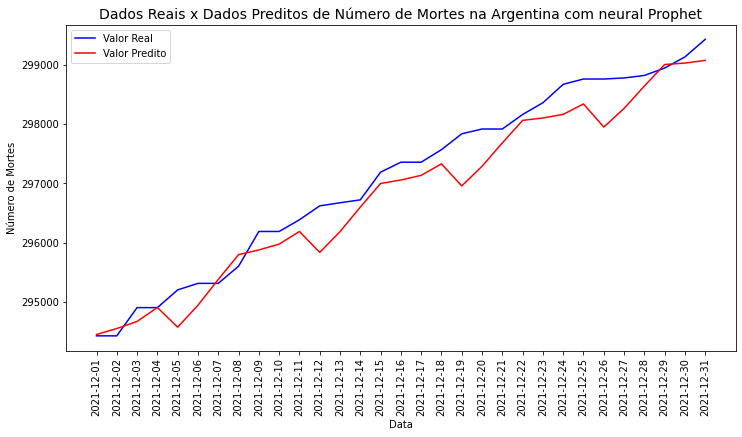

In [258]:
plt.figure(figsize=(12,6))
plt.title('Dados Reais x Dados Preditos de Número de Mortes na Argentina com neural Prophet',
          fontsize=14)
plt.plot(teste.ds,teste.y,color='blue',label='Valor Real')
plt.plot(teste.ds,forecast.yhat1,color='red',label='Valor Predito')
plt.xticks(rotation=90)
plt.xlabel('Data')
plt.ylabel('Número de Mortes')
plt.legend();

In [259]:
print('MAPE:',mean_absolute_percentage_error(teste.y,forecast.yhat1))
print('MAE:',mean_absolute_error(teste.y,forecast.yhat1))
print('RMSE:',np.sqrt(mean_squared_error(teste.y,forecast.yhat1)))

MAPE: 0.001058138837169395
MAE: 314.66834677419354
RMSE: 391.4928306306922
